In [1]:
# libary
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm;
import statsmodels.formula.api as ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler, MinMaxScaler

%matplotlib inline
# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 22.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [20, 6]

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("data/회귀분석용 데이터3.xlsx")

In [3]:
data

,ID,거래금액(만원)_18/1,전세금(만원)_18/1,등락율18/1,전세가율18/1,인접역 수,전용면적,건축년도,건물연령,거래량1,거래허가제TF,세대수,관리원당세대수,세대당주차수,지하주차비율,복도식TF,혼합형TF,계단식TF,관리시설수
0,서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,129125.0,42166.7,4.162633,32.7,0,80,1987.0,31.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시 강남구 개포동 개포주공1단지 40,145736.8,10166.7,16.507998,7.0,1,40,1982.0,36.0,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,서울특별시 강남구 개포동 개포주공5단지 60,136666.7,42678.6,0.000000,31.2,1,60,1983.0,35.0,3,0.0,940.0,24.736842,0.693617,0.000000,1.0,0.0,0.0,5.0
3,서울특별시 강남구 개포동 개포주공5단지 80,177416.7,45000.0,0.000000,25.4,1,80,1983.0,35.0,0,0.0,940.0,24.736842,0.693617,0.000000,1.0,0.0,0.0,5.0
4,서울특별시 강남구 개포동 개포주공6단지 50,125900.0,37909.1,9.134234,30.1,1,50,1983.0,35.0,3,0.0,1060.0,26.500000,1.037736,0.000000,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4086,서울특별시 중랑구 중화동 중화동건영아파트 60,25000.0,2500.0,6.000000,10.0,1,60,1998.0,20.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4087,서울특별시 중랑구 중화동 태능에셈빌 80,35000.0,15000.0,0.000000,42.9,1,80,2005.0,13.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4088,서울특별시 중랑구 중화동 한신아파트 50,31756.2,24571.4,0.000000,77.4,5,50,1997.0,21.0,8,0.0,1544.0,35.090909,0.970855,0.683122,0.0,1.0,0.0,5.0
4089,서울특별시 중랑구 중화동 한신아파트 60,36534.6,28111.1,2.996064,76.9,5,60,1997.1,20.9,26,0.0,1544.0,35.090909,0.970855,0.683122,0.0,1.0,0.0,5.0


In [4]:
def heatmap(dataset):
    cmap = plt.cm.PuBu
    corr = dataset.corr()
    plt.figure(figsize=(25, 16))  
    sns.heatmap(corr, linewidths = 0.1, 
                vmax = 1.0, 
                square = True, 
                cmap = 'seismic', 
                linecolor = "white", 
                annot = True, 
                annot_kws = {"size" : 10})

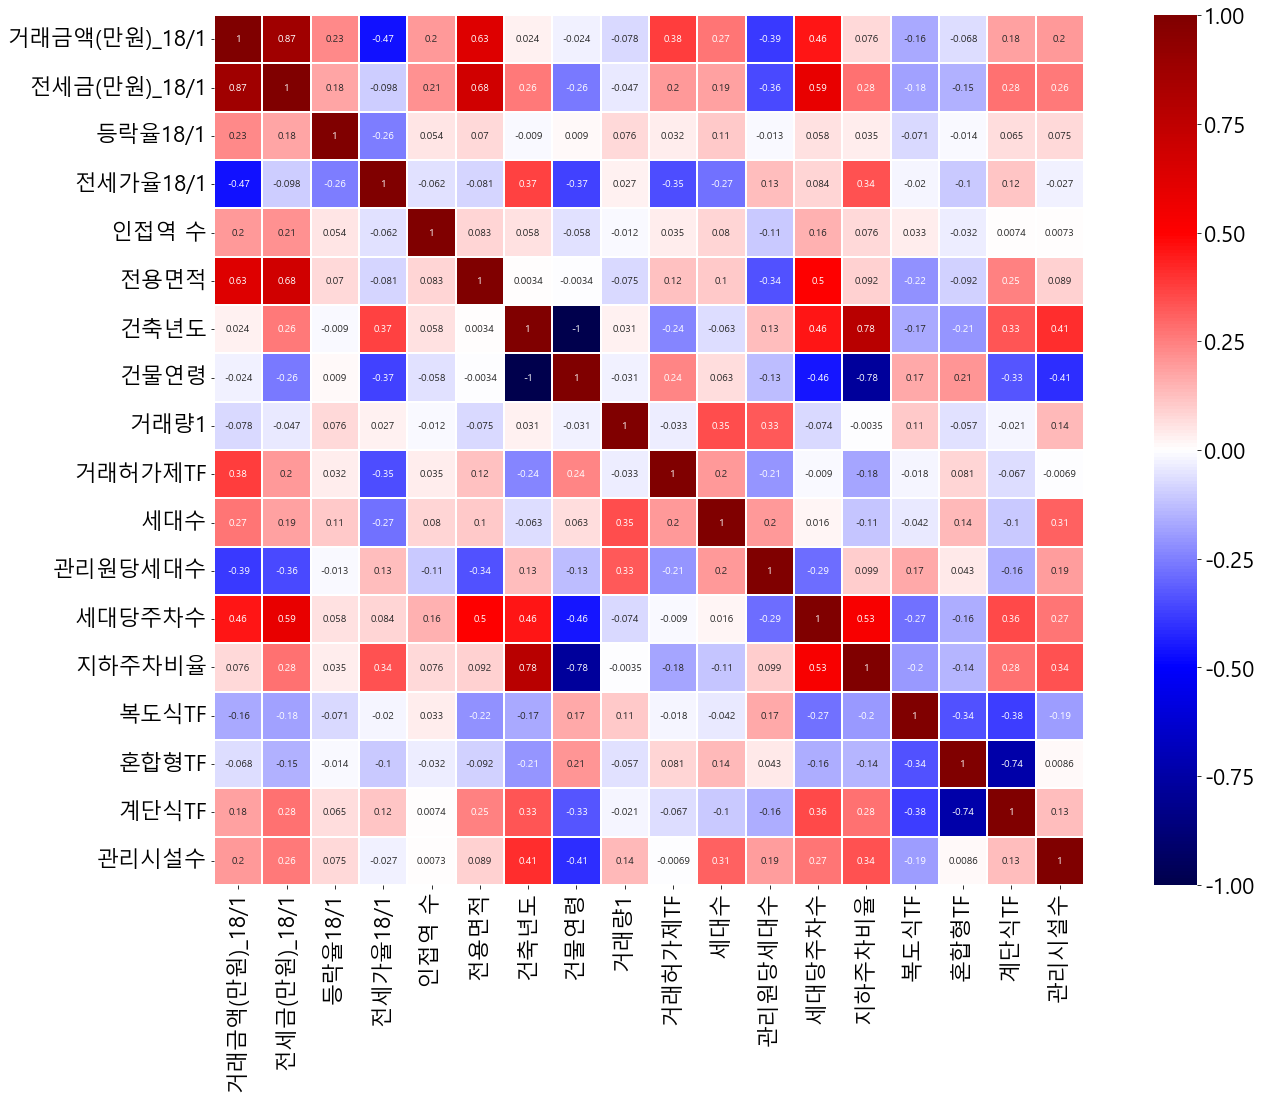

In [5]:
heatmap(data)

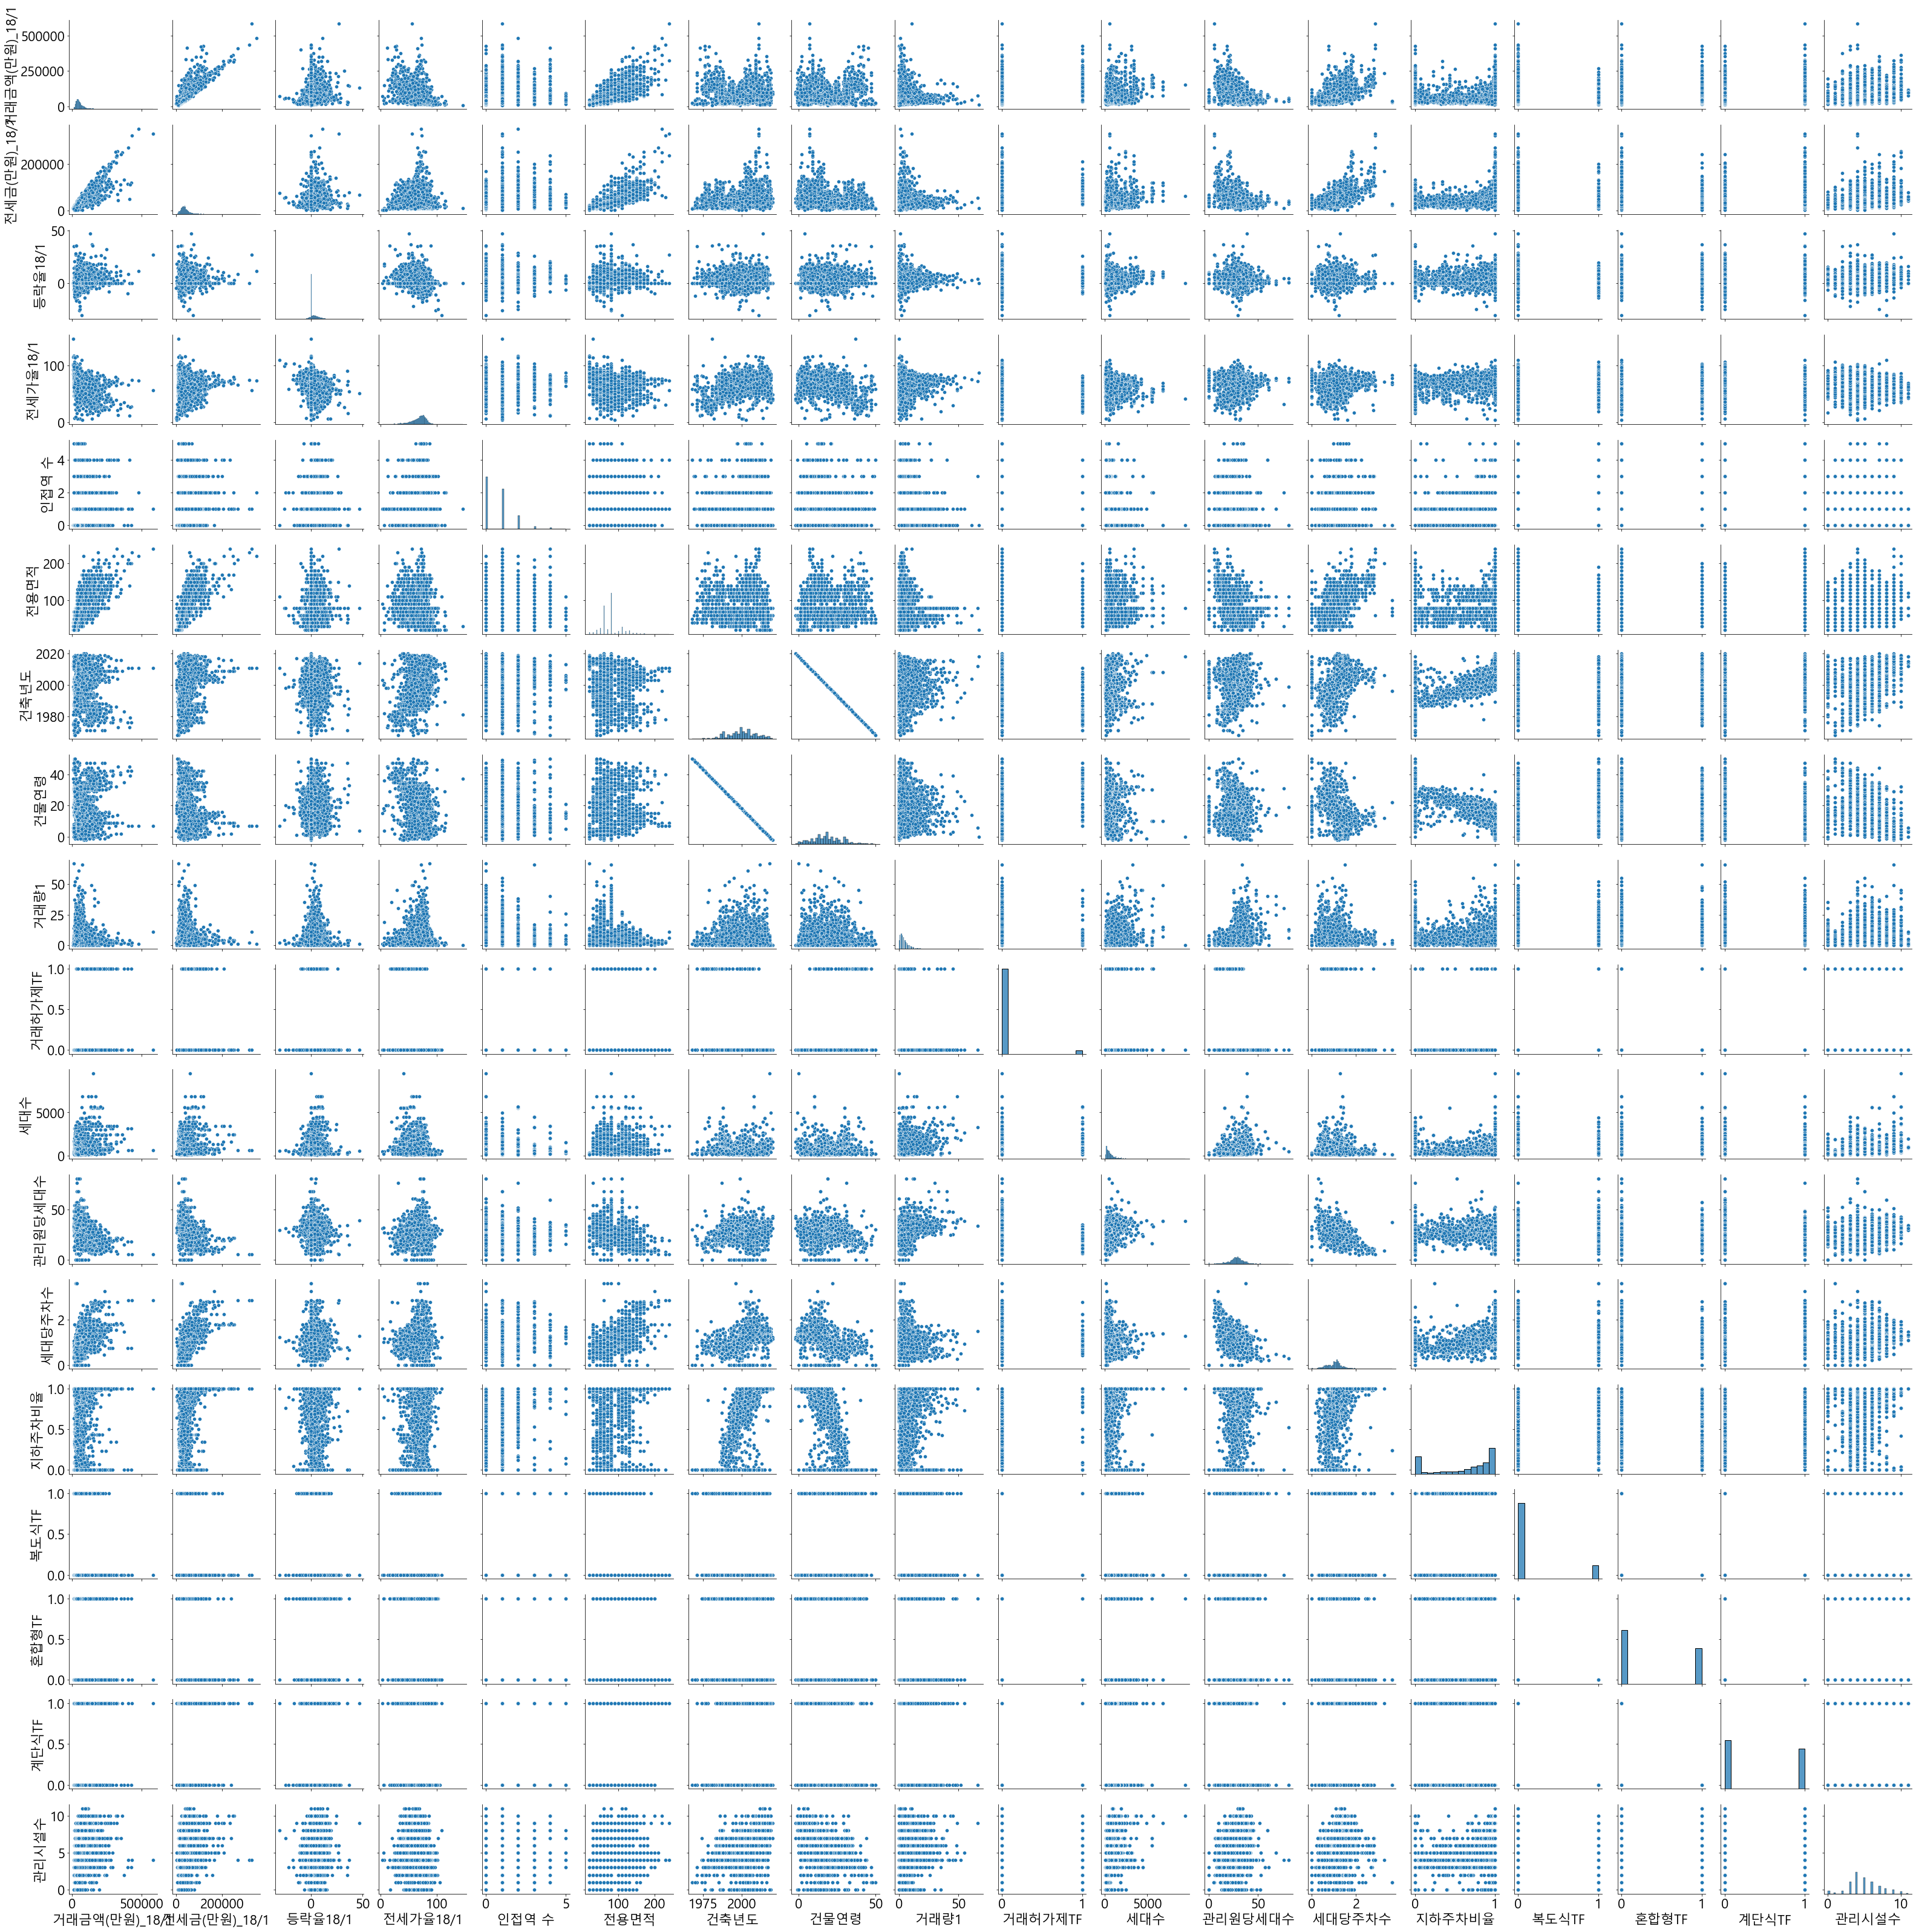

In [6]:
sns.pairplot(data)

<AxesSubplot:xlabel='거래금액(만원)_18/1', ylabel='Density'>

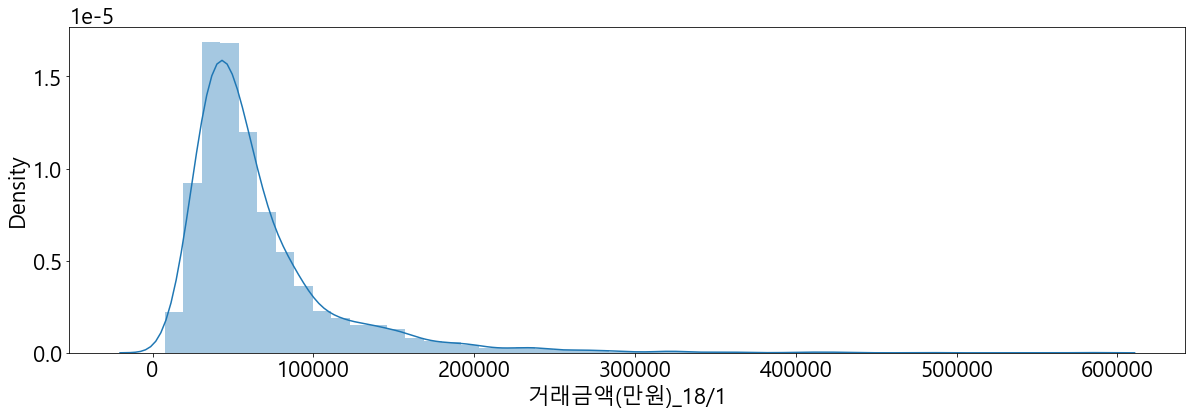

In [7]:
price = data["거래금액(만원)_18/1"]
sns.distplot(price)

In [8]:
del data['ID']
del data['건축년도']

In [9]:
data.dropna(inplace=True)

In [10]:
X = data.drop("거래금액(만원)_18/1", axis = 1)
y = data["거래금액(만원)_18/1"]

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(train_X, train_y)

# Inference
train_pred = model.predict(train_X)
val_pred = model.predict(val_X)

# RMSE
train_rmse = mean_squared_error(train_y, train_pred, squared = False)
val_rmse = mean_squared_error(val_y, val_pred, squared = False)

# r2 score
train_r2 = r2_score(train_y, train_pred)
val_r2 = r2_score(val_y, val_pred) 


print('MAE & r2 score for train/val data set'), 
print('---------------------------------------------'), 
print("RMSE score:{:.3f} , r2 score:{:.3f} for train dataset".format(train_rmse, train_r2)), 
print("RMSE score:{:.3f} , r2 score:{:.3f} for validation dataset".format(val_rmse, val_r2))

MAE & r2 score for train/val data set
---------------------------------------------
RMSE score:11863.091 , r2 score:0.940 for train dataset
RMSE score:10363.615 , r2 score:0.951 for validation dataset


In [11]:
train_temp = train_X
train_temp = sm.add_constant(train_temp)
ols = sm.OLS(train_y, train_temp).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          거래금액(만원)_18/1   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     2713.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:56:51   Log-Likelihood:                -28469.
No. Observations:                2636   AIC:                         5.697e+04
Df Residuals:                    2620   BIC:                         5.706e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          6.44e+04   1954.822     32.942      0.000    6.06e+04    6.82e+04
전세금(만원)_18/1     1.5096      0.015     99.628      0.000       1.480       1.539
등락율18/1       -138.5441     48.484     -2.858      0.004    -233.614     -43.474
전세가율18/1     -1281.0826     21.782    -58.814      0.000   -1323.794   -1238.371
인접역 수        -1211.6305    270.943     -4.472      0.000   -1742.914    -680.347
전용면적            62.4222     12.028      5.190      0.000      38.837      86.008
건물연령           190.6400     46.441      4.105      0.000      99.575     281.705
거래량1          -165.8648     42.240     -3.927      0.000    -248.692     -83.037
거래허가제TF       1.748e+04   1297.864     13.465      0.000    1.49e+04       2e+04
세대수              1.3081      0.349      3.746      0.000       0.623       1.993
관리원당세대수        -56.9086     36.544     -1.557      0.120    -128.568      14.750
세대당주차수       -2137.9848    831.727     -2.571      0.010   -3768.894    -507.076
지하주차비율        2137.0360   1107.097      1.930      0.054     -33.838    4307.909
복도식TF         1.944e+04    810.728     23.981      0.000    1.79e+04     2.1e+04
혼합형TF         2.239e+04    750.966     29.813      0.000    2.09e+04    2.39e+04
계단식TF         2.256e+04    740.190     30.485      0.000    2.11e+04     2.4e+04
관리시설수         -429.5357    133.068     -3.228      0.001    -690.464    -168.607
==============================================================================
Omnibus:                     2176.249   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           133244.976
Skew:                           3.482   Prob(JB):                         0.00
Kurtosis:                      37.127   Cond. No.                     4.18e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.98e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""